In [3]:
import utils
import matplotlib.pyplot as plot
import matplotlib.image as image
import math
import numpy as np

In [4]:
img = utils.readpgm("./images/stanf.pgm")

600 404
255


In [5]:
print (np.asarray (img.matrix))

[[213 212 212 ... 248 248 248]
 [214 213 213 ... 249 248 248]
 [214 213 213 ... 249 249 249]
 ...
 [  0   1   3 ...  23  21  20]
 [  6   9  16 ...  29  27  25]
 [  0   4  13 ...   5   2   1]]


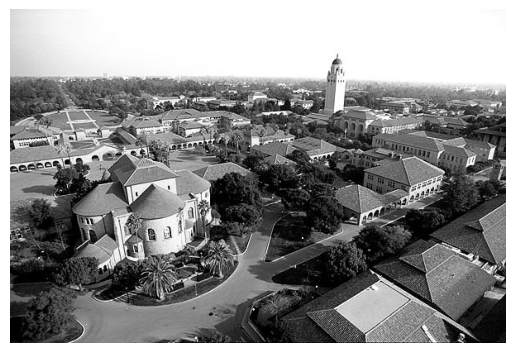

In [6]:
plot.imshow(img.matrix, cmap='gray')
plot.axis('off')
plot.show()

# Lowpass

## Smoothing (also called averaging) spatial filters are used to reduce sharp transitions in intensity.

The simplest, separable lowpass filter kernel is the box kernel, whose coefficients
have the same value (typically 1). The name “box kernel” comes from a constant
kernel resembling a box 3x3.

In [7]:
#Weight vector

b = 3
w = np.ones((b,b))

#w = np.array([[0,1,0], [1,-4,1], [0,1,0]])

In [8]:
img_out = np.zeros((img.height, img.width))

box_sum = 0
for i in range(b): 
  for j in range(b):
    box_sum = box_sum + w[i][j]

max = -math.inf
min = math.inf

for i in range(1,img.height-1): 
  for j in range(1,img.width-1):
    sum = 0
    for y in range(-1, 2):
      for x in range(-1, 2):
        sum = sum + (w[y][x] * img.matrix[i+y][j+x])
    
    value = int(sum)
    min = value if value < min else min
    max = value if value > max else max
    img_out[i][j] = value

print(min,  "/" , max)




0 / 2295


Text(0.5, 1.0, 'Lowpass')

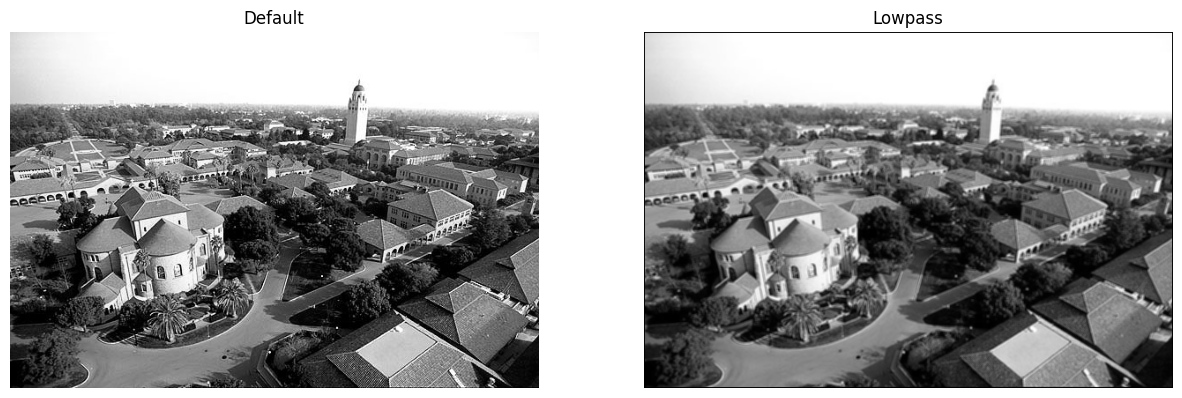

In [9]:
fig = plot.figure(figsize=(15, 15)) 
rows = 1
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Out
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_out, cmap='gray')
plot.axis('off') 
plot.title("Lowpass") 
